## Customer Support Twitter Analysis for Technology Companies

##### Objective:
This notebook explores customer interactions in a Customer Support Twitter dataset. We focus on understanding the relationship between response times and customer satisfaction for technology support services, including MicrosoftHelps, AppleSupport, DellCares, and HPSupport.

##### Approach:
Through meticulous analysis, we get into response times and customer sentiments in conversations. By examining these factors, we aim to uncover valuable patterns and trends, offering insights into effective customer support practices.

##### Key Question: 
What is the relationship between average response time & customer satisfaction for each technology support service?

##### Purpose impact:
This analysis aims to help the analyzed companies by providing actionable insights derived from customer interactions. By understanding customer sentiments and response dynamics, these technology support companies can optimize their communication strategies, fostering improved customer satisfaction and engagement.

In [112]:
# Imports used in this Python file
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from textblob import TextBlob
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
import numpy as np

#### Load the Dataset

In [113]:
file_path = 'twcs.csv'
data_set = pd.read_csv('twcs.csv')
data_set.head(10)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0
5,6,sprintcare,False,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...,"5,7",8.0
6,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN
7,11,sprintcare,False,Tue Oct 31 22:10:35 +0000 2017,@115713 This is saddening to hear. Please shoo...,NaN,12.0
8,12,115713,True,Tue Oct 31 22:04:47 +0000 2017,@sprintcare You gonna magically change your co...,"11,13,14",15.0
9,15,sprintcare,False,Tue Oct 31 20:03:31 +0000 2017,@115713 We understand your concerns and we'd l...,12,16.0


In [114]:
data_set.shape

(2811774, 7)

#### Exploring and cleaning the data to obtain specific companies 

In [115]:
filtered_data = data_set[data_set['author_id'].isin(['MicrosoftHelps', 'AppleSupport', 'DellCares', 'HPSupport'])]

In [116]:
filtered_data.head(10)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
120,203,MicrosoftHelps,False,Tue Oct 31 22:08:00 +0000 2017,"@115751 Hello, Josh! To get better assistance ...",204,205.0
123,207,MicrosoftHelps,False,Tue Oct 31 22:04:21 +0000 2017,@115752 Help is here. To assist you in recover...,NaN,208.0
396,696,AppleSupport,False,Tue Oct 31 22:27:49 +0000 2017,@115854 We're here for you. Which version of t...,697,698.0
398,699,AppleSupport,False,Tue Oct 31 22:36:27 +0000 2017,@115854 Lets take a closer look into this issu...,NaN,697.0
401,701,AppleSupport,False,Tue Oct 31 22:26:49 +0000 2017,@115855 Let's go to DM for the next steps. DM ...,NaN,702.0
403,703,AppleSupport,False,Tue Oct 31 22:09:52 +0000 2017,@115855 Any steps tried since it started last ...,702,704.0
405,705,AppleSupport,False,Tue Oct 31 21:57:00 +0000 2017,@115855 That's great it has iOS 11.1 as we can...,"706,704",707.0
407,708,AppleSupport,False,Tue Oct 31 21:43:15 +0000 2017,@115855 We'd like to look into this with you. ...,707,709.0
411,712,AppleSupport,False,Tue Oct 31 22:26:29 +0000 2017,"@115856 Hey, let's work together to figure out...",713,714.0
414,716,AppleSupport,False,Tue Oct 31 22:24:54 +0000 2017,@115857 We'd like to investigate further with ...,NaN,717.0


In [117]:
# Group the filtered data and count the number of tweets in each company
grouped_data = filtered_data.groupby(['author_id', 'inbound']).size().reset_index(name='count')
grouped_data.head(10)

,author_id,inbound,count
0,AppleSupport,False,106860
1,DellCares,False,5336
2,HPSupport,False,7200
3,MicrosoftHelps,False,11304


#### How many null values does the filtered data contain?

In [118]:
print(filtered_data.isnull().sum())

tweet_id                       0
author_id                      0
inbound                        0
created_at                     0
text                           0
response_tweet_id          91724
in_response_to_tweet_id      332
dtype: int64


In [119]:
# Handle Missing Values
filtered_data = data_set.dropna()

In [120]:
print(cleaned_data.isnull().sum())

tweet_id                   0
author_id                  0
inbound                    0
created_at                 0
text                       0
response_tweet_id          0
in_response_to_tweet_id    0
dtype: int64


#### What company has the most and least amount of tweets?

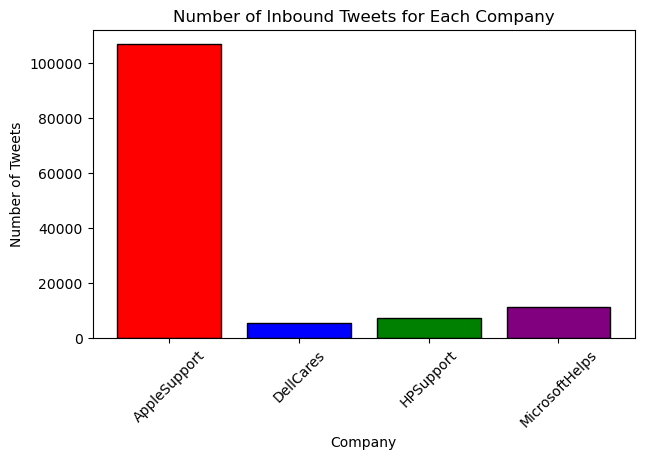

In [121]:
companies = grouped_data['author_id']
inbound_counts = grouped_data['count']
colors = ['red', 'blue', 'green', 'purple']
plt.figure(figsize=(7, 4))
plt.bar(companies, inbound_counts, color=colors, edgecolor='black')
plt.xlabel('Company')
plt.ylabel('Number of Tweets')
plt.title('Number of Inbound Tweets for Each Company')
plt.xticks(rotation=45) 
plt.show();

#### Now let's find the average response times for each company

In [124]:
filtered_data = data_set[data_set['author_id'].str.contains('MicrosoftHelps|AppleSupport|DellCares|HPSupport', case=False)]

In [125]:
# Convert 'created_at' and 'response_tweet_id' columns to datetime
filtered_data['created_at'] = pd.to_datetime(filtered_data['created_at'], errors='coerce').dt.tz_localize(None)
filtered_data['response_tweet_id'] = pd.to_datetime(filtered_data['response_tweet_id'], errors='coerce').dt.tz_localize(None)

In [126]:
# Filter out rows where 'response_tweet_id' or 'created_at' couldn't be parsed
cleaned_filtered_data = filtered_data.dropna(subset=['created_at', 'response_tweet_id'])

In [127]:
# Calculate response time in seconds 
cleaned_filtered_data['response_time'] = (cleaned_filtered_data['response_tweet_id'] - cleaned_filtered_data['created_at']).dt.total_seconds()

#### Results for average response times

In [139]:
average_response_time = cleaned_filtered_data.groupby('author_id')['response_time'].mean()
print(average_response_time)

author_id
AppleSupport      1.145536e+08
DellCares         1.839929e+07
HPSupport         7.365916e+08
MicrosoftHelps    3.703211e+08
Name: response_time, dtype: float64


#### What companies have the fastest and slowest response time?

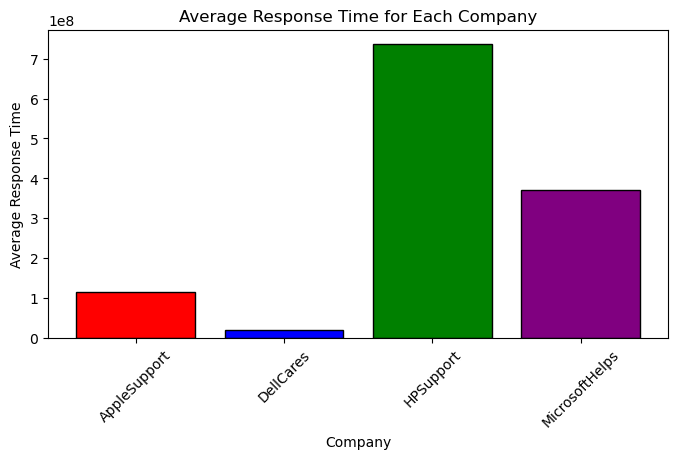

In [140]:
companies = average_response_time.index
response_times = average_response_time.values
plt.figure(figsize=(8, 4))
colors = ['red', 'blue', 'green', 'purple']
plt.bar(companies, response_times, color=colors, edgecolor='black')
plt.xlabel('Company')
plt.ylabel('Average Response Time')
plt.title('Average Response Time for Each Company')
plt.xticks(rotation=45)  
plt.show()

#### Let's calculate the final response times for each company based on the information found

#### AppleSupport

In [185]:
average_response_time_apple = 1.145536e+08  
inbound_tweet_count_apple = 106860 
final_response_time_apple = inbound_tweet_count_apple * average_response_time_apple
print(f"Final Response Time for AppleSupport: {final_response_time_apple} milliseconds")

Final Response Time for AppleSupport: 12241197696000.0 milliseconds


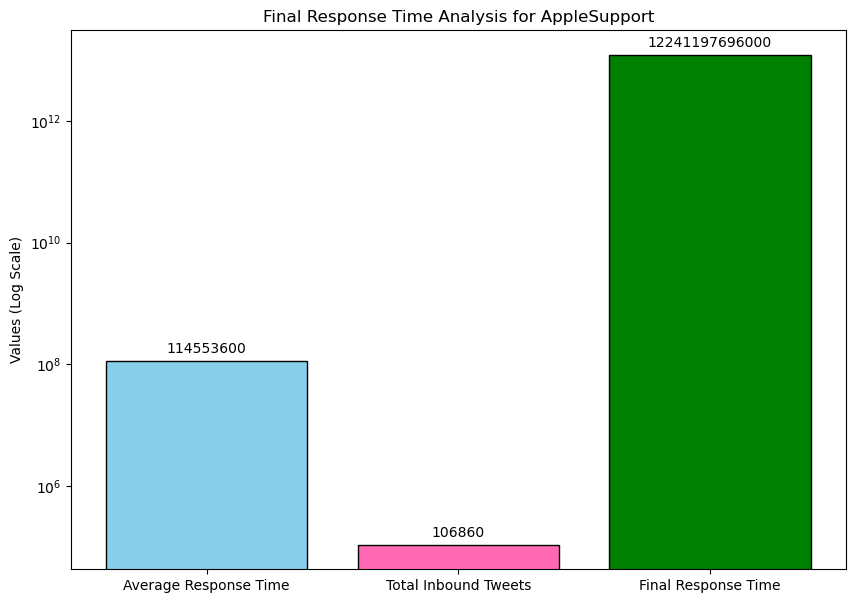

In [186]:
categories = ['Average Response Time', 'Total Inbound Tweets', 'Final Response Time']
values = [average_response_time_apple, inbound_tweet_count_apple, final_response_time_apple]

plt.figure(figsize=(10, 7))
plt.bar(categories, values, color=['skyblue', 'hotpink', 'green'],edgecolor='black')

for i, v in enumerate(values):
    plt.text(i, v + 0.2 * v, f"{v:.0f}", ha='center', va='bottom', fontsize=10)

plt.ylabel('Values (Log Scale)')
plt.yscale('log') 
plt.title('Final Response Time Analysis for AppleSupport')
plt.show()


#### DellCares

In [189]:
average_response_time_dell = 1.839929e+07
inbound_tweet_count_dell = 5336
final_response_time_dell = inbound_tweet_count_dell * average_response_time_dell
print(f"Final Response Time for Dellcares: {final_response_time_dell} milliseconds")

Final Response Time for Dellcares: 98178611440.0 milliseconds


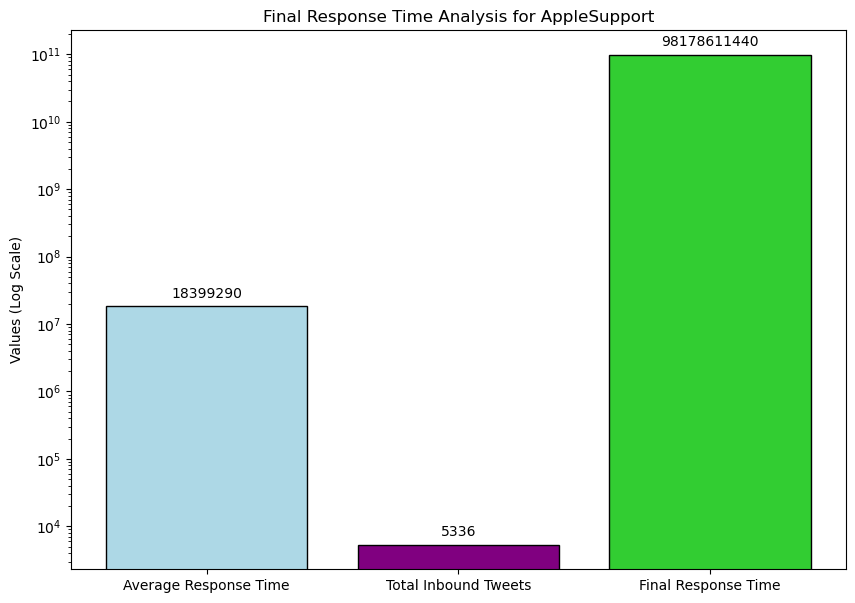

In [193]:
categories = ['Average Response Time', 'Total Inbound Tweets', 'Final Response Time']
values = [average_response_time_dell, inbound_tweet_count_dell, final_response_time_dell]

plt.figure(figsize=(10, 7))
plt.bar(categories, values, color=['lightblue', 'purple', 'limegreen'],edgecolor='black')

for i, v in enumerate(values):
    plt.text(i, v + 0.2 * v, f"{v:.0f}", ha='center', va='bottom', fontsize=10)

plt.ylabel('Values (Log Scale)')
plt.yscale('log') 
plt.title('Final Response Time Analysis for AppleSupport')
plt.show()

#### HPSupport

In [204]:
average_response_time_hp = 7.365916e+08
inbound_tweet_count_hp = 7200
final_response_time_hp = inbound_tweet_count_hp * average_response_time_hp
print(f"Final Response Time for HPSupport: {final_response_time_hp} milliseconds")

Final Response Time for HPSupport: 5303459520000.0 milliseconds


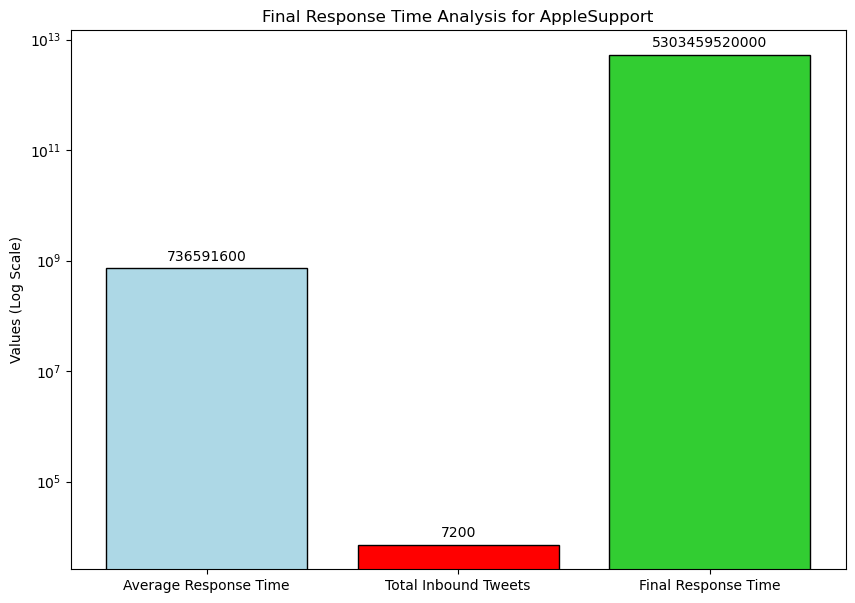

In [205]:
categories = ['Average Response Time', 'Total Inbound Tweets', 'Final Response Time']
values = [average_response_time_hp, inbound_tweet_count_hp, final_response_time_hp]

plt.figure(figsize=(10, 7))
plt.bar(categories, values, color=['lightblue', 'red', 'limegreen'],edgecolor='black')

for i, v in enumerate(values):
    plt.text(i, v + 0.2 * v, f"{v:.0f}", ha='center', va='bottom', fontsize=10)

plt.ylabel('Values (Log Scale)')
plt.yscale('log') 
plt.title('Final Response Time Analysis for AppleSupport')
plt.show()

In [203]:
average_response_time_microsoft = 3.703211e+08
inbound_tweet_count_microsoft = 11304
final_response_time_microsoft = inbound_tweet_count_microsoft * average_response_time_microsoft
print(f"Final Response Time for MicrosoftHelps: {final_response_time_microsoft} milliseconds")

Final Response Time for MicrosoftHelps: 4186109714400.0 milliseconds


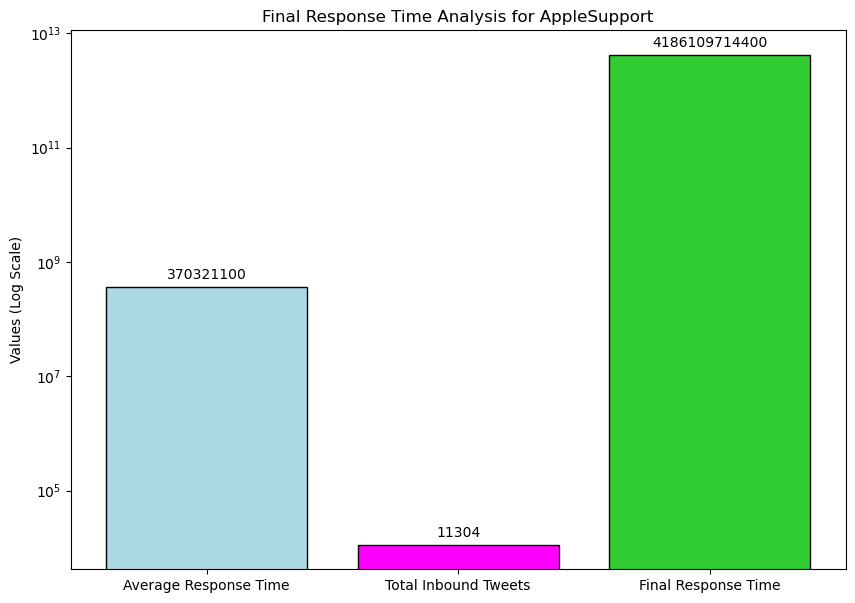

In [209]:
categories = ['Average Response Time', 'Total Inbound Tweets', 'Final Response Time']
values = [average_response_time_microsoft, inbound_tweet_count_microsoft, final_response_time_microsoft]

plt.figure(figsize=(10, 7))
plt.bar(categories, values, color=['lightblue', 'magenta', 'limegreen'],edgecolor='black')

for i, v in enumerate(values):
    plt.text(i, v + 0.2 * v, f"{v:.0f}", ha='center', va='bottom', fontsize=10)

plt.ylabel('Values (Log Scale)')
plt.yscale('log') 
plt.title('Final Response Time Analysis for AppleSupport')
plt.show()

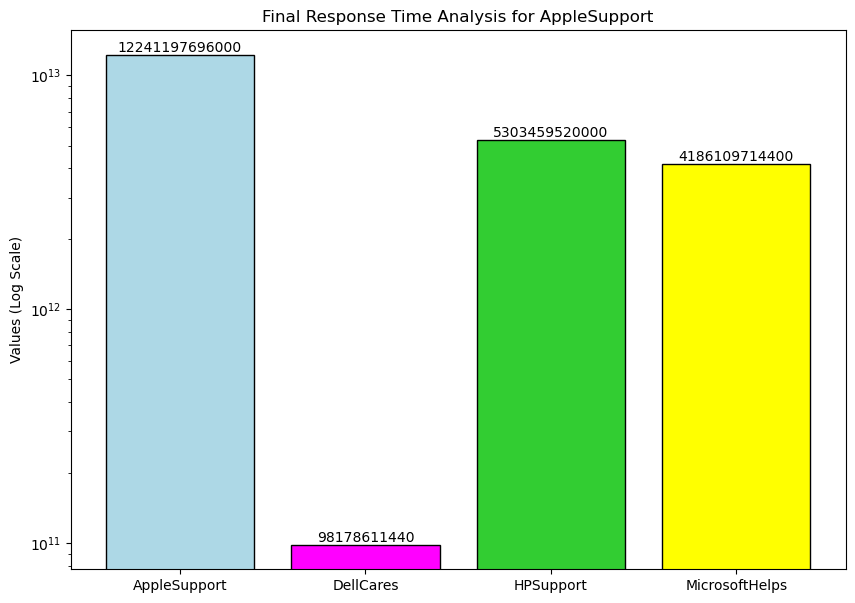

In [213]:
categories = ['AppleSupport', 'DellCares', 'HPSupport', 'MicrosoftHelps']
values = [final_response_time_apple, final_response_time_dell,final_response_time_hp, final_response_time_microsoft]

plt.figure(figsize=(10, 7))
plt.bar(categories, values, color=['lightblue', 'magenta', 'limegreen','yellow'],edgecolor='black')

for i, v in enumerate(values):
    plt.text(i, v + 0 * v, f"{v:.0f}", ha='center', va='bottom', fontsize=10)

plt.ylabel('Values (Log Scale)')
plt.yscale('log') 
plt.title('Final Response Time Analysis for AppleSupport')
plt.show()

### Results

'AppleSupport' has the highest average response time, while 'DellCares' has the lowest average response time.
Shorter response times are often associated with higher customer satisfaction. Customers tend to be more satisfied when their issues are addressed promptly.